## Import Modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

%matplotlib inline

## Loading the Data Collection & Processing


In [2]:
#Loading the data from csv file to Pandas DataFrame
titanic_data = pd.read_csv('tested.csv')



In [3]:
#Printing the first 5 rrows of the DataFrame 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
#Getting Information about thee provided data
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
#Checking the number of missing values in eaach column 
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling the Misssing values

In [6]:
#Drop the "Cabin" column from the DataFrame
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

In [7]:
#replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [8]:
#replacing the missing values in "Fare" column with mean value
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [9]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [10]:
#Getting some statistical measure about the data
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [11]:
#finding the number of people survived and not survived
titanic_data['Survived'].value_counts()


Survived
0    266
1    152
Name: count, dtype: int64

## Data Visualisation


In [12]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

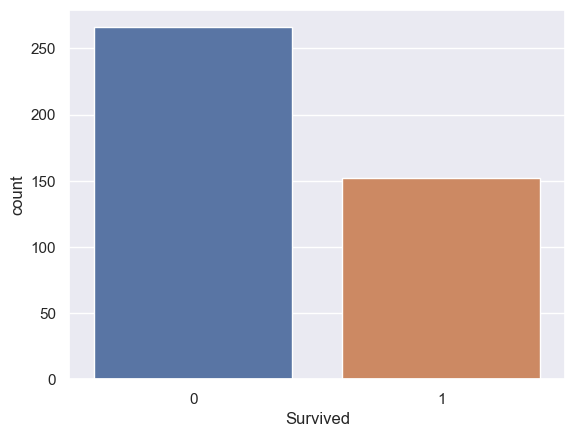

In [13]:
#making a count plot for 'Survived' column
sns.countplot(data=titanic_data, x='Survived')


In [14]:
#Number of male and female
titanic_data['Sex'].value_counts()


Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

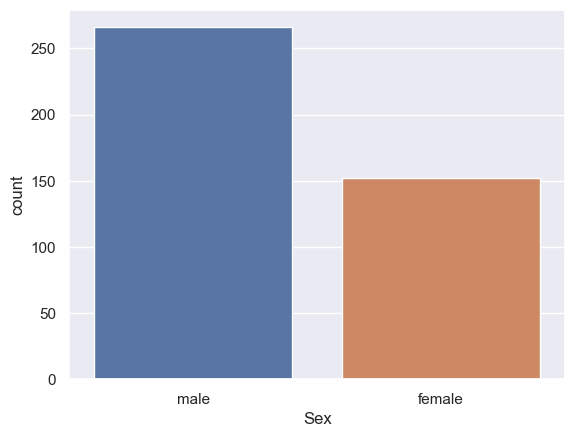

In [15]:
#making a count plot for 'Sex' column
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

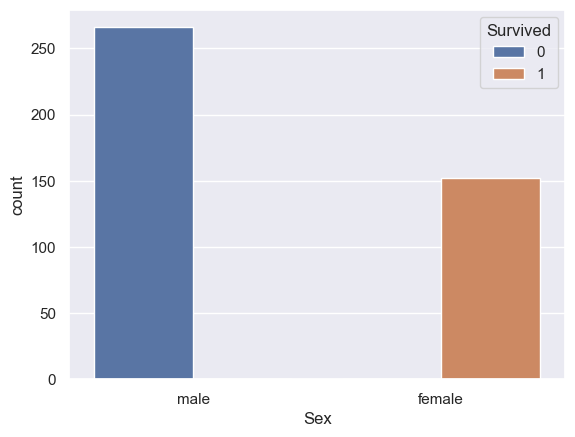

In [16]:
#number of survivors Gender wise
sns.countplot(x='Sex', hue = 'Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

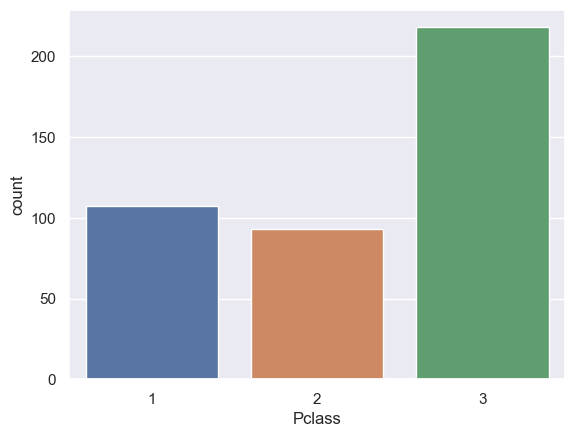

In [17]:
#making a count plot for 'Pclass' column
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

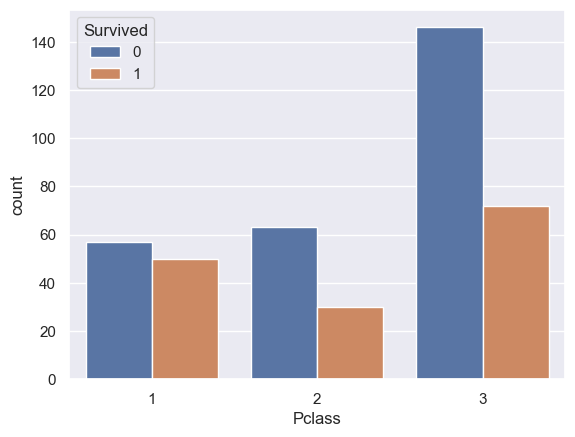

In [18]:
sns.countplot(x='Pclass', hue = 'Survived', data=titanic_data)

<Axes: xlabel='SibSp', ylabel='count'>

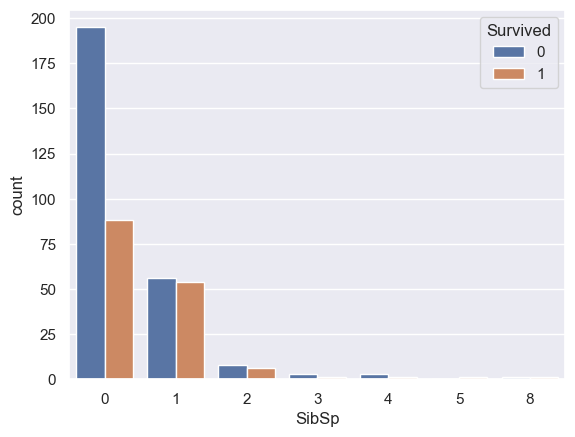

In [19]:
#making a count plot for 'SibSp' column
sns.countplot(x='SibSp', hue = 'Survived', data=titanic_data)

## Encoding the Categorical Column

In [20]:
titanic_data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [21]:
titanic_data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [22]:
#converting the categorical Columns
titanic_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)



In [23]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0


## Separating Features And Target

In [24]:
X = titanic_data.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_data['Survived']

In [25]:
print(Y)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


## Splitting the Data into training & Test Data

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)


In [27]:
print(X.shape, X_train.shape, X_test.shape)

(418, 7) (334, 7) (84, 7)


# Model Training
## LogisticRegression


In [28]:
 model = LogisticRegression()

In [29]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

LogisticRegression()

# Model Evaluation


## Accuracy Score

In [30]:
# accuracy on training data
X_train_prediction = model.predict(X_train)

In [31]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [32]:
training_data_accuracy = accuracy_score(Y_train,X_train_prediction)
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  1.0


In [33]:
# accuracy on test data
X_test_prediction = model.predict(X_test)

In [34]:
print(X_test_prediction)

[0 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 0 0 0 0]


In [35]:
test_data_accuracy = accuracy_score(Y_test,X_test_prediction)
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  1.0
